In [34]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

In [32]:
data=pd.read_csv("eeg_data.csv")
data.head()

,-0.16897227,-0.178321981,-0.095154471,-0.051145173,-0.024695237,0.006821866,0.146600514,0.049728133,-0.030760814,-0.030717532,...,0.784022832,0.506615997,0.657809798,0.726842459,0.044562985,0.169059196,0.267928391,0.438069021,-0.028649762,1
0,1.150855,1.023013,0.482823,1.808277,1.681753,0.369737,1.162185,2.948635,1.297460,1.556453,...,0.240170,0.612654,0.860099,0.984312,0.763681,1.023541,0.478984,0.591697,-0.018466,1
1,-0.239892,-0.286383,-0.117660,-0.041761,0.045529,0.350156,0.757991,0.672565,0.261040,0.249775,...,0.320247,1.314314,1.746596,1.972543,0.145621,0.192455,0.480254,1.275407,-0.019574,1
2,0.616870,0.935586,0.557368,0.506930,1.129597,0.015468,-0.019766,0.371247,0.159066,0.341238,...,2.490612,1.543079,1.936653,2.168959,1.326236,1.985246,1.321501,1.634900,-0.008216,1
3,-0.203458,-0.082669,0.101029,0.022260,0.554096,0.258584,0.295721,0.092840,0.010436,0.063246,...,1.729174,1.035423,1.461515,1.546399,0.365488,0.338945,1.001988,1.224796,-0.013884,1
4,0.594482,0.142026,0.020022,0.562168,0.201262,1.015226,1.649477,0.720609,0.267196,0.035037,...,0.831768,0.712272,0.949732,1.076258,0.202871,1.748063,0.576664,0.627897,-0.025558,1


# Normalise data

In [41]:


Norm_feature=normalize(data.loc[:,data.columns != '1'], norm='l2', axis=1, copy=True)
labels=np.array(data.loc[:,data.columns == '1'])

In [123]:
print "Total feature ", len(Norm_feature[1])
print "Total data ", len(Norm_feature),len(labels)

Total feature  1344
Total data  2669 2669


# CrEating testing and Trainig set

In [95]:
train_x=np.concatenate((Norm_feature[:730],Norm_feature[800:2061],Norm_feature[2150:]),axis=0)
train_y=np.concatenate((labels[:730],labels[800:2061],labels[2150:]),axis=0)

test_x=np.concatenate((Norm_feature[700:801],Norm_feature[2060:2150]),axis=0)
test_y=np.concatenate((labels[700:801],labels[2060:2150]))

In [96]:
print "training data",len(train_x)
print "testing data",len(test_x)

training data 2510
testing data 191


# SVM Classifier

In [97]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=.8,C=4) #SVM Classier
svm={} #store accuracy data for plotting

In [98]:
#training
clsf.fit(train_x, train_y)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.8, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Testing accuracy on training data

In [99]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'

Accuracy Check  96.2549800797 %


# Testing accuracy on Testing data

In [100]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  70.1570680628 %


In [101]:
svm

{'test_set': 70.157068062827221, 'trainig_set': 96.254980079681275}

# Decision Tree Classifier

In [102]:
decision={}
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=4)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [103]:
#train
clf = clf.fit(train_x, train_y)

# Testing accuracy on training data

In [104]:


#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'



Accuracy Check  96.4940239044 %


# Testing accuracy on Testing data

In [105]:


prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'



Accuracy Check  62.3036649215 %


In [106]:
decision

{'test_set': 62.303664921465973, 'trainig_set': 96.494023904382473}

# Neural Net classifier

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(50,), alpha=1e-5, random_state=1)
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [110]:
#trainig Network
clf.fit(train_x, train_y)

/home/sudhanshu/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:894: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# Testing accuracy on training data

In [112]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  98.4860557769 %


# Testing accuracy on testing data

In [114]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  71.7277486911 %


# Plotting

In [121]:
import pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

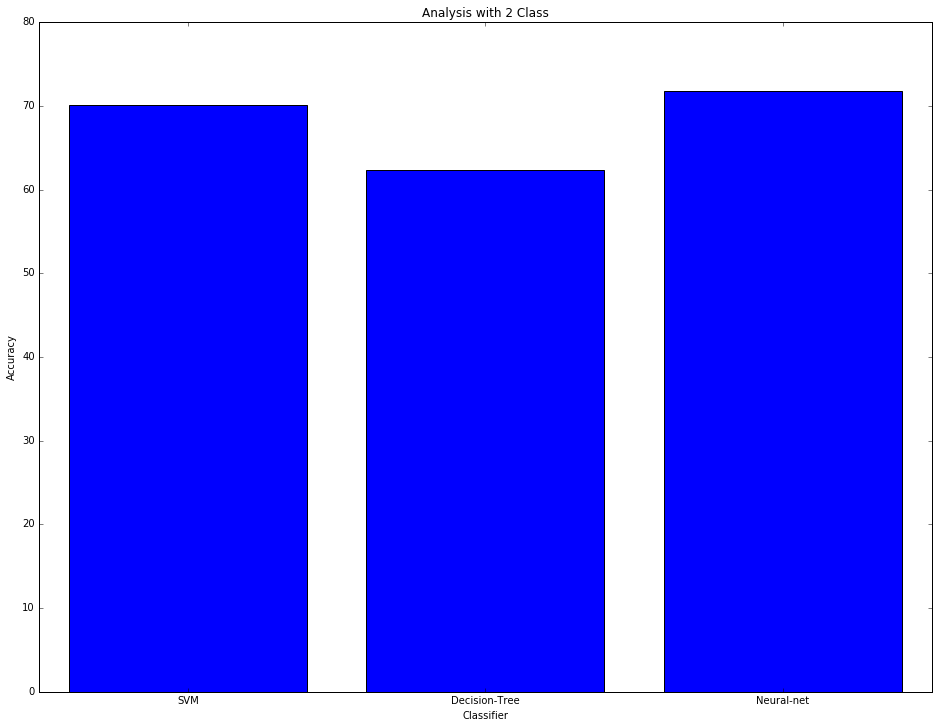

In [122]:
#%pylab inline
classifier = [1,2,3]
accuracy_test_data=[svm["test_set"],decision["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 2 Class')
plt.show()